### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [3]:
# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [4]:
class LogisticRegression():
    
    def __init__(self, k, n, method="batch", alpha=0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.method = method
        self.alpha = alpha
        self.max_iter = max_iter
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                cost, grad =  self.gradient(X, Y, self.W)
                self.losses.append(cost)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                self.W = self.W - self.alpha * grad
            print(f"Method {self.method} took: {time.time() - start_time} seconds")
        
        elif self.method == "minibatch":
            batch_size = 10
            ix = np.random.randint(0, X.shape[0])
            start_time = time.time()
            for i in range(self.max_iter):
                X_mini = X[ix:ix+batch_size]
                Y_mini = Y[ix:ix+batch_size]
                cost, grad = self.gradient(X_mini, Y_mini, self.W)
                self.losses.append(cost)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                self.W = self.W - self.alpha * grad
            print(f"Method {self.method} took: {time.time() - start_time} seconds")
        
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                used_ix = []
                ix = np.random.randint(X.shape[0])
                
                # if current sample already taken before, try one that hasn't
                while ix in used_ix:
                    ix = np.random.randint(X.shape[0])
                
                X_sto = X[ix, :].reshape(1,-1)
                Y_sto = Y[ix, :]
                cost, grad = self.gradient(X_sto, Y_sto, self.W)
                self.losses.append(cost)
                used_ix.append(ix)
                if i % 500 == 0:
                    print(f"Cost at iteration {i}", cost)
                self.W = self.W - self.alpha * grad
                
                if len(used_ix) == X.shape[0]:
                    used_ix = []
            print(f"Method {self.method} took: {time.time() - start_time} seconds")
        
        else:
            raise ValueError("Invalid method")
            
        
    
    def gradient(self, X, Y, W):
        m = X.shape[0]
        h = self.h_theta(X, W)
        cost = - np.sum(Y * np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return cost, grad
    
    def h_theta(self, X, W):
        return self.softmax(X @ W)
    
    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)
    
    def softmax_grad(self, X, error):
        return  X.T @ error
    
    def predict(self,X):
        return np.argmax(self.h_theta(X, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Losses")
        plt.title("Losses")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")

Cost at iteration 0 1.5811019118630936
Cost at iteration 500 0.17297760019645672
Cost at iteration 1000 0.12814449608832887
Cost at iteration 1500 0.11047249816375887
Cost at iteration 2000 0.10093829170801555
Cost at iteration 2500 0.09497066548354967
Cost at iteration 3000 0.09089404139198558
Cost at iteration 3500 0.0879433059260379
Cost at iteration 4000 0.08571761321338997
Cost at iteration 4500 0.08398607719672423
Cost at iteration 5000 0.08260612611736162
Cost at iteration 5500 0.08148489916099663
Cost at iteration 6000 0.08055930456318756
Cost at iteration 6500 0.07978498093610739
Cost at iteration 7000 0.0791298379152904
Cost at iteration 7500 0.07857009977068517
Cost at iteration 8000 0.07808778758172706
Cost at iteration 8500 0.07766906391778562
Cost at iteration 9000 0.07730311364291977
Cost at iteration 9500 0.07698136852438162
Method batch took: 0.43199658393859863 seconds
==================== Classification data =====================
Report:                precision    r

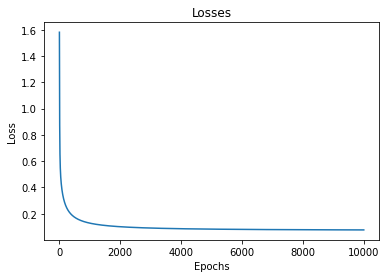

In [5]:
model = LogisticRegression(k, n, method="batch")
model.fit(X_train, Y_train_encoded)
model.plot()
print("==================== Classification data =====================")
yhat = model.predict(X_test)
print("Report: ", classification_report(y_test, yhat))

Cost at iteration 0 1.0148385751251954
Cost at iteration 500 0.25245843789618694
Cost at iteration 1000 0.20456885804399993
Cost at iteration 1500 0.1791612102199089
Cost at iteration 2000 0.16032825978282222
Cost at iteration 2500 0.14508140979664755
Cost at iteration 3000 0.13231939749019916
Cost at iteration 3500 0.12145178737254272
Cost at iteration 4000 0.11209149461450865
Cost at iteration 4500 0.10395787528476805
Cost at iteration 5000 0.09683686242491257
Cost at iteration 5500 0.09056058100951998
Cost at iteration 6000 0.08499510384364126
Cost at iteration 6500 0.08003228524571429
Cost at iteration 7000 0.07558395936627697
Cost at iteration 7500 0.07157766003228243
Cost at iteration 8000 0.06795338796140798
Cost at iteration 8500 0.06466113010702908
Cost at iteration 9000 0.06165893386149275
Cost at iteration 9500 0.058911398035249675
Method minibatch took: 0.3279993534088135 seconds
==================== Classification data =====================
Report:                precision

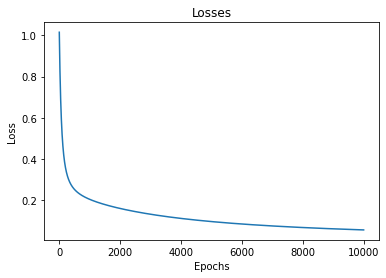

In [6]:
model = LogisticRegression(k, n, method="minibatch")
#model = LogisticRegression(k, n, method="invalid")
model.fit(X_train, Y_train_encoded)
model.plot()
print("==================== Classification data =====================")
yhat = model.predict(X_test)
print("Report: ", classification_report(y_test, yhat))

Cost at iteration 0 0.7874199199358756
Cost at iteration 500 0.8615516905089649
Cost at iteration 1000 0.8406263999022894
Cost at iteration 1500 0.8412065521828227
Cost at iteration 2000 0.26636319615240733
Cost at iteration 2500 1.0076062140575417
Cost at iteration 3000 0.3412657790525376
Cost at iteration 3500 0.18529739236209358
Cost at iteration 4000 0.907130886320646
Cost at iteration 4500 0.9143690932840675
Cost at iteration 5000 0.21619165661989592
Cost at iteration 5500 0.2649496455154042
Cost at iteration 6000 0.13151642050638757
Cost at iteration 6500 0.11771401573509266
Cost at iteration 7000 0.09534912153238649
Cost at iteration 7500 0.10937151074836837
Cost at iteration 8000 0.21122621829831045
Cost at iteration 8500 0.09546875671353613
Cost at iteration 9000 0.3328532718512003
Cost at iteration 9500 0.7527118749158879
Method sto took: 0.3930497169494629 seconds
==================== Classification data =====================
Report:                precision    recall  f1-sc

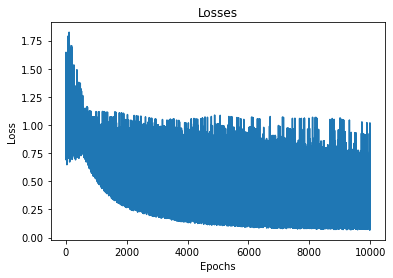

In [7]:
model = LogisticRegression(k, n, method="sto")
#model = LogisticRegression(k, n, method="invalid")
model.fit(X_train, Y_train_encoded)
model.plot()
print("==================== Classification data =====================")
yhat = model.predict(X_test)
print("Report: ", classification_report(y_test, yhat))

## 6. Discussion

It seems the method leading to the lowest lost is the batch method while the highest loss is using sto. In contrast, the fastest method is minibatch, which seem to be adequate for larger datasets in the future.